In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, silhouette_score
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA, TruncatedSVD

In [5]:
# df_each = [pd.read_csv(filename, header=None, delimiter=',', names=[f"A{i}" for i in range(11)]) for filename in glob.glob("./data/*.txt")]
# df = pd.concat(df_each, axis=0)


df = pd.read_csv('C:/BADS_NIDA/BADS_7205/Quiz2/train data/train_all.csv')

In [6]:
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,365.684615,380.192308,22,40,44,4,5,69,61,64,47.0
1,396.432836,386.828358,25,32,33,1,5,77,66,57,50.0
2,335.674157,374.764045,26,46,51,5,6,108,88,76,56.0
3,346.833333,385.871795,27,40,47,7,5,103,71,65,52.0
4,371.468750,395.756250,26,44,50,6,6,94,63,74,56.0


A0) Position in X axis => position X [1, 2, 3, 2, 1] / 5  
A1) Position in Y axis => position Y [200, 150, 130, 170] / 4  
A2) Number of coins collected => Total  
A3) Number of destroyed enemies => Total  
A4) Number of shots => Total  
A5) Number of shots without enemies => Total (A4 - A3)  
A6) Level reach  
A7) key X pressed count  
A8) key Y pressed count  
A9) Number of enemy created  
A10) Number of coin created  

In [7]:
df.shape

(261, 11)

In [8]:
df.describe()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,369.908421,349.600989,13.137931,41.386973,53.701149,12.314176,3.789272,68.233716,32.762452,60.187739,216.911547
std,49.891212,72.130792,8.834163,31.252810,39.095873,13.529205,1.733616,44.461684,29.447951,39.000187,2987.130965
min,214.189189,160.888889,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,5.000000
25%,344.493243,305.750000,6.000000,16.000000,24.000000,4.000000,3.000000,32.000000,9.000000,29.000000,21.000000
50%,372.464567,353.083333,11.000000,37.000000,47.000000,7.000000,4.000000,67.000000,22.000000,57.000000,31.000000
75%,400.850000,396.077778,20.000000,64.000000,76.000000,16.000000,5.000000,98.000000,52.000000,88.000000,44.000000
max,527.869792,520.855000,40.000000,148.000000,212.000000,69.000000,7.000000,215.000000,130.000000,182.000000,48289.913790


In [9]:
df = df.fillna(0)

In [10]:
df_train = df

<AxesSubplot:>

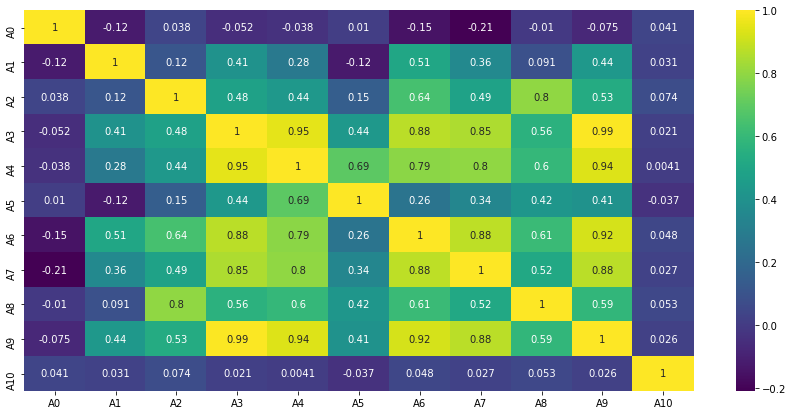

In [11]:
# correlation between feature
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_train.corr(),cmap='viridis', annot=True)

<ipython-input-12-ee4772996e2a>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
C:\Users\Peeranut Chuasuai\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Peeranut Chuasuai\.conda\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-12-ee4772996e2a>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(numb

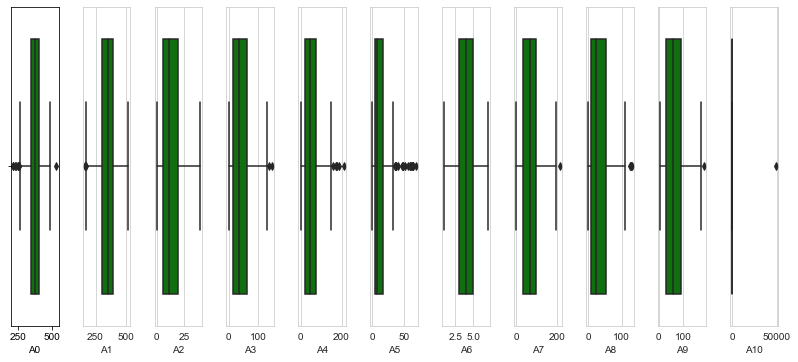

In [12]:
# identify outlier in given feature
l = df_train.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_train[l[i]],color='green',orient='v')
    plt.tight_layout()

<ipython-input-13-0fa02babc821>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1, number_of_columns, i+1)
C:\Users\Peeranut Chuasuai\.conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-13-0fa02babc821>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1, number_of_columns, i+1)
C:\Users\Peeranut Chuasuai\.conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated fun

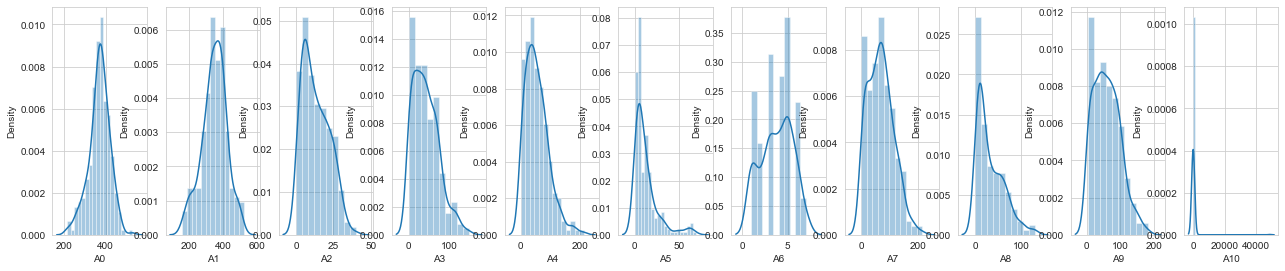

In [13]:
# identidy distribution in each featur
plt.figure(figsize=(2*number_of_columns, 5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.distplot(df[l[i]], kde=True) 

In [14]:
scaler = StandardScaler()

In [15]:
scaller_train = scaler.fit_transform(df_train)

In [16]:
scaller_train

array([[-0.08482297,  0.42492382,  1.00508614, ...,  0.96073913,
         0.0979376 , -0.05699047],
       [ 0.53266644,  0.51710082,  1.34532931, ...,  1.13085644,
        -0.08189355, -0.05598423],
       [-0.68749654,  0.34952341,  1.4587437 , ...,  1.87937259,
         0.40621957, -0.05397175],
       ...,
       [ 0.36898142, -0.9429185 ,  0.43801419, ...,  0.68855144,
        -0.10758372, -0.06202165],
       [-0.03832514, -0.36602419, -1.49003043, ..., -1.08066857,
        -1.41778211, -0.07107779],
       [-0.5479089 , -0.60910514, -1.49003043, ..., -1.08066857,
        -1.41778211, -0.07107779]])

Train K-mean and apply 4 cluster

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(scaller_train)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1,
       0, 2, 2, 1, 3, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0,
       2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [18]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("label:", unique)
print("counts:", counts)

label: [0 1 2 3]
counts: [123  79  58   1]


In [20]:
silhouette_score(scaller_train, kmeans.labels_)

0.2372377456079806

In [21]:
df_train['Y'] = kmeans.labels_
df_train

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Y
0,365.684615,380.192308,22,40,44,4,5,69,61,64,47.0,0
1,396.432836,386.828358,25,32,33,1,5,77,66,57,50.0,0
2,335.674157,374.764045,26,46,51,5,6,108,88,76,56.0,0
3,346.833333,385.871795,27,40,47,7,5,103,71,65,52.0,0
4,371.468750,395.756250,26,44,50,6,6,94,63,74,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
256,370.692308,174.230769,6,8,27,19,1,11,12,13,11.0,1
257,383.555556,165.555556,3,7,18,11,1,15,14,12,8.0,1
258,388.282051,281.717949,17,41,50,9,3,52,53,56,32.0,0
259,368.000000,323.250000,0,0,0,0,1,0,1,5,5.0,1


In [22]:
df_train.groupby(['Y']).mean()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
Y,,,,,,,,,,,
0,365.499937,371.148511,14.861789,41.902439,52.406504,10.504065,4.203252,72.634146,31.829268,62.772358,35.869919
1,373.362270,298.448926,5.329114,8.810127,15.607595,6.797468,1.708861,21.075949,11.329114,17.291139,13.860759
2,373.982523,372.985659,19.948276,84.517241,108.327586,23.810345,5.724138,122.844828,63.534483,112.896552,48.568966
3,403.000000,383.957746,23.000000,50.000000,54.000000,4.000000,5.000000,85.000000,56.000000,74.000000,48289.913790


In [23]:
mean_collected_coin = list(df_train.groupby(['Y']).mean()['A2'])
mean_enemies_kills = list(df_train.groupby(['Y']).mean()['A3'])
print(mean_enemies_kills)
print(mean_collected_coin)

[41.90243902439025, 8.810126582278482, 84.51724137931035, 50.0]
[14.861788617886178, 5.329113924050633, 19.948275862068964, 23.0]


In [24]:
labels = []
num_labels = len(mean_collected_coin)
for i in range(num_labels):
    if i % 2 == 0:
        sorted_index = np.argsort(mean_collected_coin)
    else:
        sorted_index = np.argsort(mean_enemies_kills)

    sorted_index = list(sorted_index)
    sorted_index.reverse()
    for max_index in sorted_index:
        if max_index not in labels:
            labels.append(max_index)
            break

print(labels)

LABELS = {
    labels[0]: 'Hardcore Achiever',
    labels[1]: 'Hardcore Killer',
    labels[2]: 'Casual Achiever',
    labels[3]: 'Casual Killer',
}
print(LABELS)

[3, 2, 0, 1]
{3: 'Hardcore Achiever', 2: 'Hardcore Killer', 0: 'Casual Achiever', 1: 'Casual Killer'}


Train decision tree

In [25]:
X = df_train.iloc[:, 0:11]
X

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,365.684615,380.192308,22,40,44,4,5,69,61,64,47.0
1,396.432836,386.828358,25,32,33,1,5,77,66,57,50.0
2,335.674157,374.764045,26,46,51,5,6,108,88,76,56.0
3,346.833333,385.871795,27,40,47,7,5,103,71,65,52.0
4,371.468750,395.756250,26,44,50,6,6,94,63,74,56.0
...,...,...,...,...,...,...,...,...,...,...,...
256,370.692308,174.230769,6,8,27,19,1,11,12,13,11.0
257,383.555556,165.555556,3,7,18,11,1,15,14,12,8.0
258,388.282051,281.717949,17,41,50,9,3,52,53,56,32.0
259,368.000000,323.250000,0,0,0,0,1,0,1,5,5.0


In [26]:
y = df_train.iloc[:, 11]
y

0      0
1      0
2      0
3      0
4      0
      ..
256    1
257    1
258    0
259    1
260    1
Name: Y, Length: 261, dtype: int32

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
dt_scaler = StandardScaler()

In [29]:
X_train_scale = dt_scaler.fit_transform(X_train)
X_train_scale

array([[-0.05556713, -2.32449738, -0.8061842 , ..., -0.78548833,
        -1.25545029, -0.07589213],
       [ 1.03677777,  1.87127151, -0.69156608, ..., -0.71914048,
         1.30099787, -0.06810314],
       [ 0.30363934,  0.23345887,  1.60079638, ...,  0.77368607,
         0.14808988, -0.06360949],
       ...,
       [ 0.84237244,  0.2698365 , -0.92080233, ..., -0.81866225,
         0.24834274, -0.07020017],
       [-0.62980203,  0.65191439, -1.49389294, ..., -1.0177058 ,
        -1.43089282, -0.07768959],
       [ 1.24730257, -0.161712  ,  0.91308764, ...,  0.57464253,
        -0.12760552, -0.06690483]])

In [30]:
gbt_clf = GradientBoostingClassifier()
accuracies = cross_val_score(gbt_clf, X_train_scale, y_train, cv=10)
print(accuracies.mean())

C:\Users\Peeranut Chuasuai\.conda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.8895238095238094


In [31]:
dt_clf = DecisionTreeClassifier()
accuracies = cross_val_score(dt_clf, X_train_scale, y_train, cv=10)
print(accuracies.mean())

0.9045238095238094


C:\Users\Peeranut Chuasuai\.conda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [32]:
rbt_clf = RandomForestClassifier()
accuracies = cross_val_score(rbt_clf, X_train_scale, y_train, cv=10)
print(accuracies.mean())

C:\Users\Peeranut Chuasuai\.conda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.9283333333333333


In [33]:
clf = RandomForestClassifier()
clf.fit(X_train_scale, y_train)

X_test_scale = dt_scaler.transform(X_test)
y_pred = clf.predict(X_test_scale)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.94      0.89      0.92        19
           2       0.88      0.70      0.78        10

    accuracy                           0.87        53
   macro avg       0.88      0.84      0.85        53
weighted avg       0.87      0.87      0.87        53



In [34]:
dump(clf, '../SpaceWars/model/model.h5')

['../SpaceWars/model/model.h5']

In [35]:
dump(dt_scaler, '../SpaceWars/model/scaler.bin')

['../SpaceWars/model/scaler.bin']

In [36]:
print(LABELS)

{3: 'Hardcore Achiever', 2: 'Hardcore Killer', 0: 'Casual Achiever', 1: 'Casual Killer'}
